In [1]:
import music21 as m21
#import json
import ast
import os
from random import shuffle

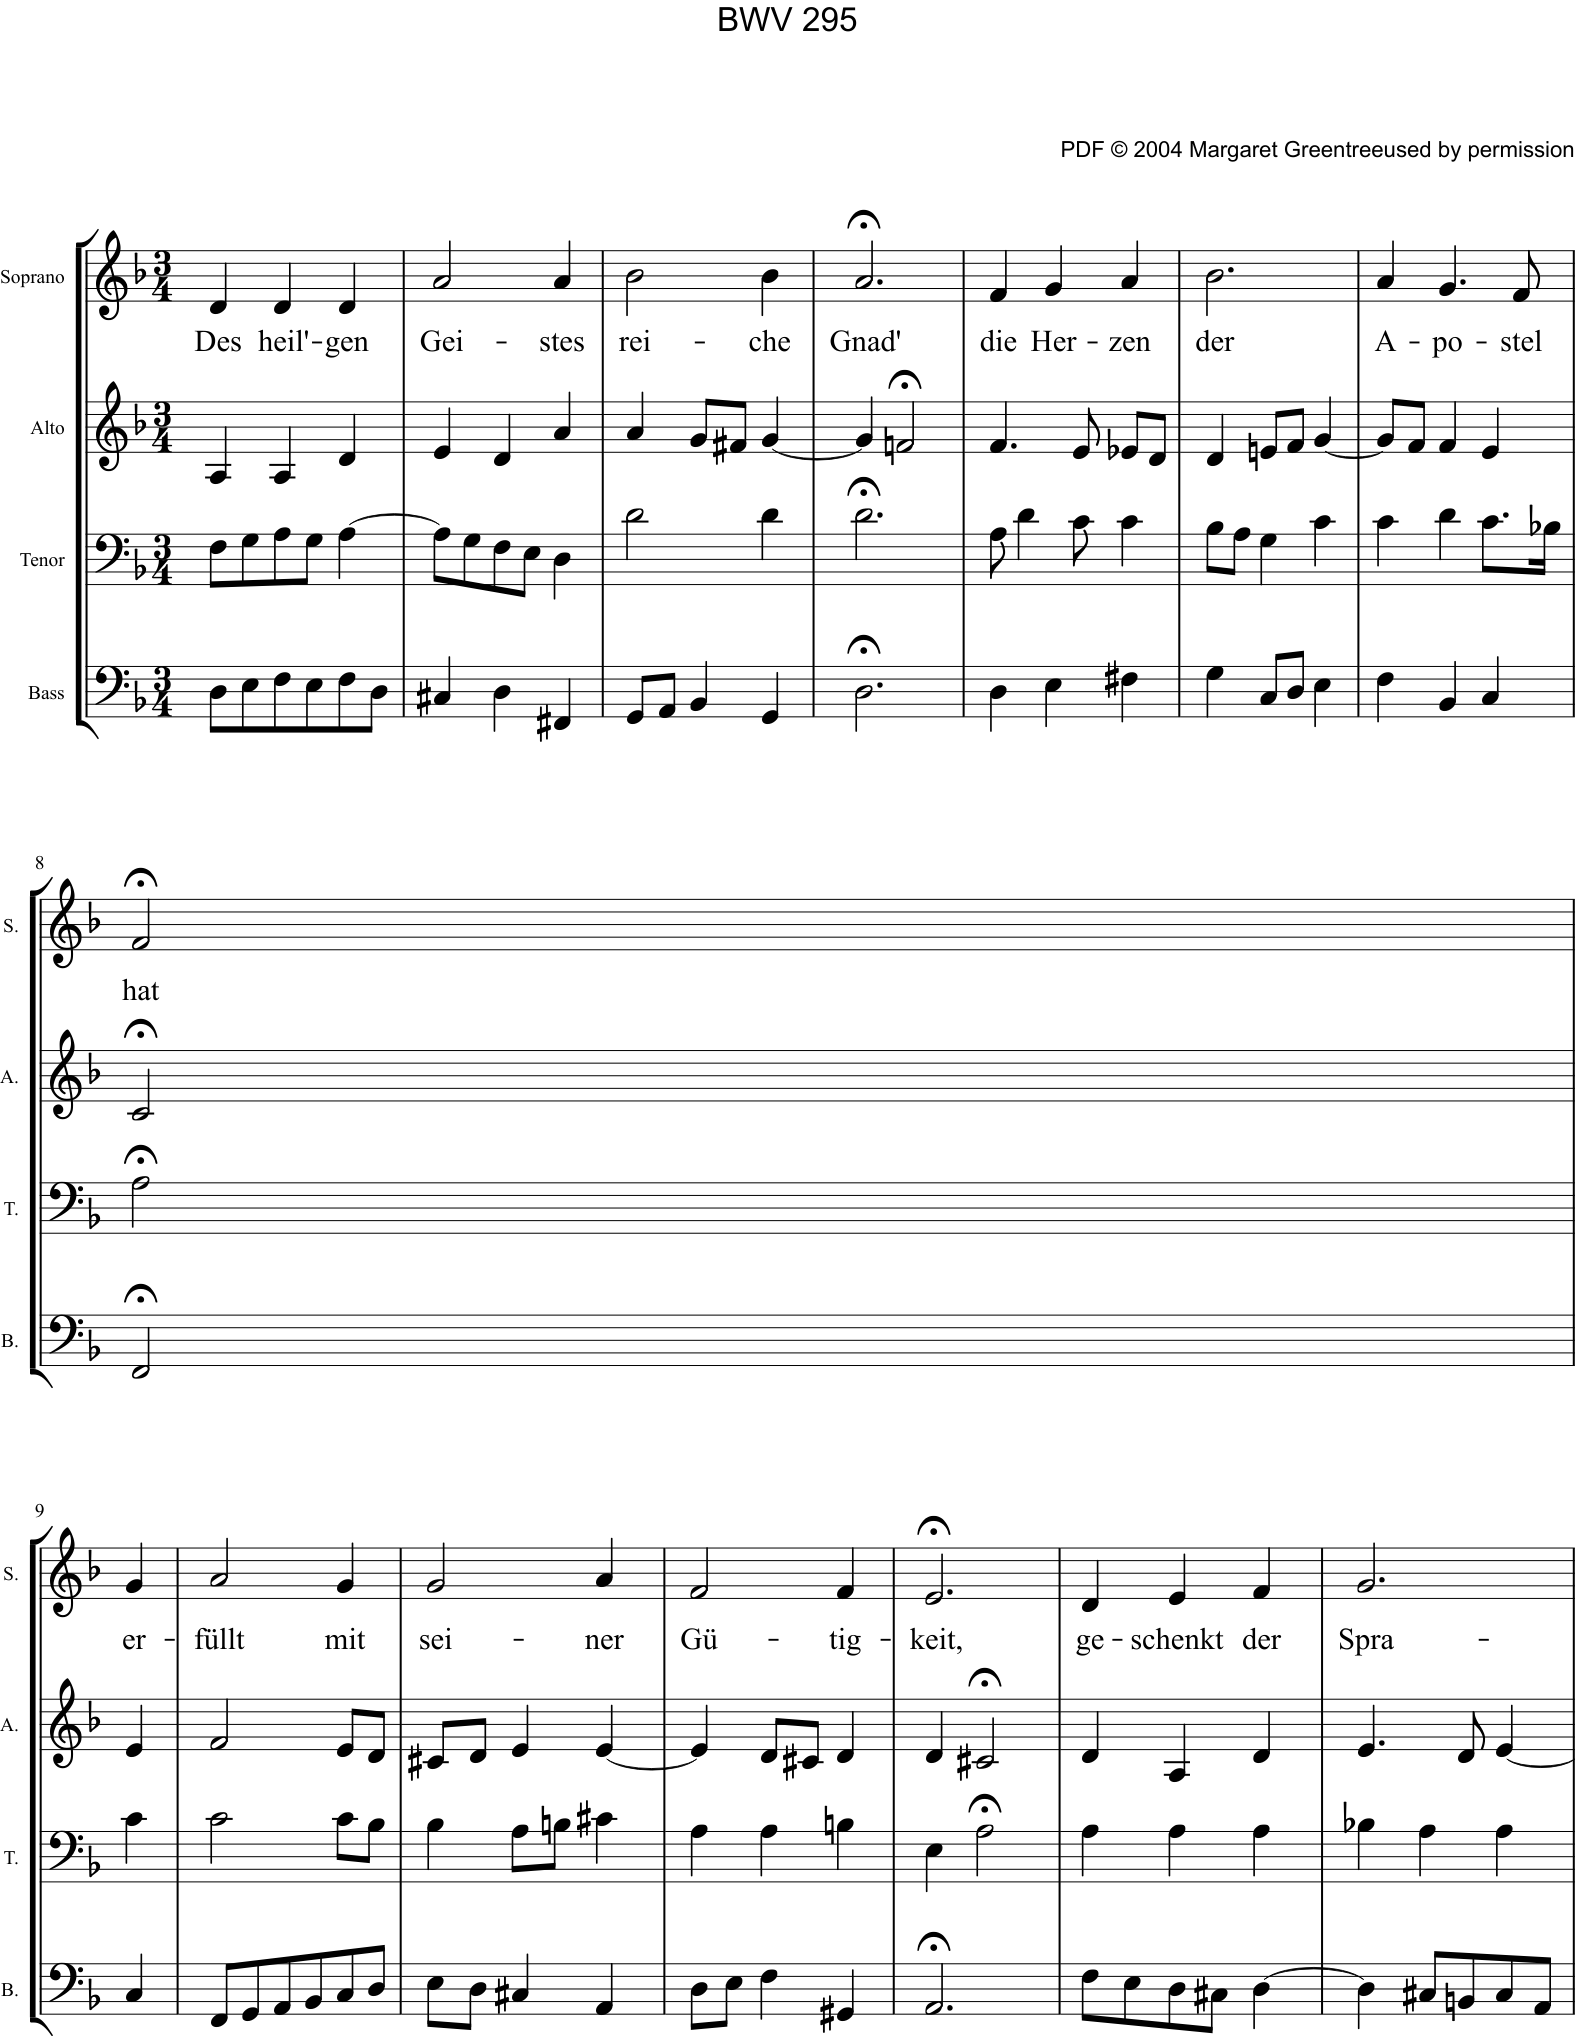

In [2]:
bwv295 = m21.corpus.parse('bach/bwv295')
bwv295.show()

In [302]:
print(bwv295.metadata.opusNumber)

None


In [3]:
bwv295.show('midi')

In [20]:
PATH='data/music/'

In [21]:
def convert_to_mldata_3(work):
    k = work.analyze('key')
    i = m21.interval.Interval(k.tonic, m21.pitch.Pitch('C'))
    wrk = work.flat.transpose(i)
    
    lst = []
    for i in range(int(wrk.highestTime*4)):
        lst.append([])
    for n in wrk.notes:
        off = int(n.offset*4)
        d = n.duration
        dur = int(d.quarterLength*4)
        for pit in n.pitches:
            name = pit.nameWithOctave
            lst[off].append([name,int(d.quarterLength*4)]) 
        l = 0
        ss = ""
        for i in range(len(lst)):
            i_len = len(lst[i])
            if i_len>0:
                ss+="[ "
                indexes = shuffle(range(i_len))
                for j in indexes:
                    ss+=f"{lst[i][j][0]}@{lst[i][j][1]} "
                    if j == i_len-1:
                        ss+="] "
                    else:
                        ss+=", "
            else:
                ss+=f"[ ] "
    return l, ss

In [69]:
l, ss = convert_to_mldata_3(bwv295)

In [70]:
def convert_from_mldata_3(ss):
    
    ss = ss.replace("[ ] ", "X")
    ss = ss.replace("[ ", "[['")
    ss = ss.replace("] ", "]],")
    ss = ss.replace(" , ","],['")
    ss = ss.replace("@","', ")
    ss = ss.replace('X', "[],")
    ss = "["+ss+"[]]"
    
    lst = ast.literal_eval(ss)
    
    s1 = m21.stream.Stream()
    for i in range(len(lst)):
        for element in lst[i]:
            n = m21.note.Note()
            p = m21.pitch.Pitch(element[0])
            n.pitch = p
            n.quarterLength = int(element[1])/4
            offset = i/4
            s1.insert(offset, n)
            #print(f'{offset} {n.quarterLength} {n.pitch.midi}')
    return s1

In [71]:
st = convert_from_mldata_3(ss)

In [72]:
st

<music21.stream.Stream 0x7fa9641eaf28>

In [29]:
ss

'[ C4@4 , G3@4 , E-3@2 , C3@2 ] [ ] [ F3@2 , D3@2 ] [ ] [ C4@4 , G3@4 , G3@2 , E-3@2 ] [ ] [ F3@2 , D3@2 ] [ ] [ C4@4 , C4@4 , G3@4 , E-3@2 ] [ ] [ C3@2 ] [ ] [ G4@8 , D4@4 , G3@2 , B2@4 ] [ ] [ F3@2 ] [ ] [ C4@4 , E-3@2 , C3@4 ] [ ] [ D3@2 ] [ ] [ G4@4 , G4@4 , C3@4 , E2@4 ] [ ] [ ] [ ] [ A-4@8 , G4@4 , C4@8 , F2@2 ] [ ] [ G2@2 ] [ ] [ F4@2 , A-2@4 ] [ ] [ E4@2 ] [ ] [ A-4@4 , F4@4 , C4@4 , F2@4 ] [ ] [ ] [ ] [ G4@12 , F4@4 , C4@12 , C3@12 ] [ ] [ ] [ ] [ E-4@8 ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ E-4@4 , E-4@6 , G3@2 , C3@4 ] [ ] [ C4@4 ] [ ] [ F4@4 , D3@4 ] [ ] [ D4@2 , B-3@2 ] [ ] [ G4@4 , D-4@2 , B-3@4 , E3@4 ] [ ] [ C4@2 ] [ ] [ A-4@12 , C4@4 , A-3@2 , F3@4 ] [ ] [ G3@2 ] [ ] [ D4@2 , F3@4 , B-2@2 ] [ ] [ E-4@2 , C3@2 ] [ ] [ F4@4 , B-3@4 , D3@4 ] [ ] [ ] [ ] [ G4@4 , F4@2 , B-3@4 , E-3@4 ] [ ] [ E-4@2 ] [ ] [ F4@6 , E-4@4 , C4@4 , A-2@4 ] [ ] [ ] [ ] [ D4@4 , B-3@3 , B-2@4 ] [ ] [ E-4@2 ] [ A-3@1 ] [ E-4@8 , B-3@8 , G3@8 , E-2@8 ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ F4@4 , D4@4 , B-3@4 , B

In [61]:
s1=convert_from_mldata_3(ss)

In [62]:
print(l, ss)

940 [ C4@4 , G3@4 , E-3@2 , C3@2 ] [ ] [ F3@2 , D3@2 ] [ ] [ C4@4 , G3@4 , G3@2 , E-3@2 ] [ ] [ F3@2 , D3@2 ] [ ] [ C4@4 , C4@4 , G3@4 , E-3@2 ] [ ] [ C3@2 ] [ ] [ G4@8 , D4@4 , G3@2 , B2@4 ] [ ] [ F3@2 ] [ ] [ C4@4 , E-3@2 , C3@4 ] [ ] [ D3@2 ] [ ] [ G4@4 , G4@4 , C3@4 , E2@4 ] [ ] [ ] [ ] [ A-4@8 , G4@4 , C4@8 , F2@2 ] [ ] [ G2@2 ] [ ] [ F4@2 , A-2@4 ] [ ] [ E4@2 ] [ ] [ A-4@4 , F4@4 , C4@4 , F2@4 ] [ ] [ ] [ ] [ G4@12 , F4@4 , C4@12 , C3@12 ] [ ] [ ] [ ] [ E-4@8 ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ E-4@4 , E-4@6 , G3@2 , C3@4 ] [ ] [ C4@4 ] [ ] [ F4@4 , D3@4 ] [ ] [ D4@2 , B-3@2 ] [ ] [ G4@4 , D-4@2 , B-3@4 , E3@4 ] [ ] [ C4@2 ] [ ] [ A-4@12 , C4@4 , A-3@2 , F3@4 ] [ ] [ G3@2 ] [ ] [ D4@2 , F3@4 , B-2@2 ] [ ] [ E-4@2 , C3@2 ] [ ] [ F4@4 , B-3@4 , D3@4 ] [ ] [ ] [ ] [ G4@4 , F4@2 , B-3@4 , E-3@4 ] [ ] [ E-4@2 ] [ ] [ F4@6 , E-4@4 , C4@4 , A-2@4 ] [ ] [ ] [ ] [ D4@4 , B-3@3 , B-2@4 ] [ ] [ E-4@2 ] [ A-3@1 ] [ E-4@8 , B-3@8 , G3@8 , E-2@8 ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ F4@4 , D4@4 , B-3@4 

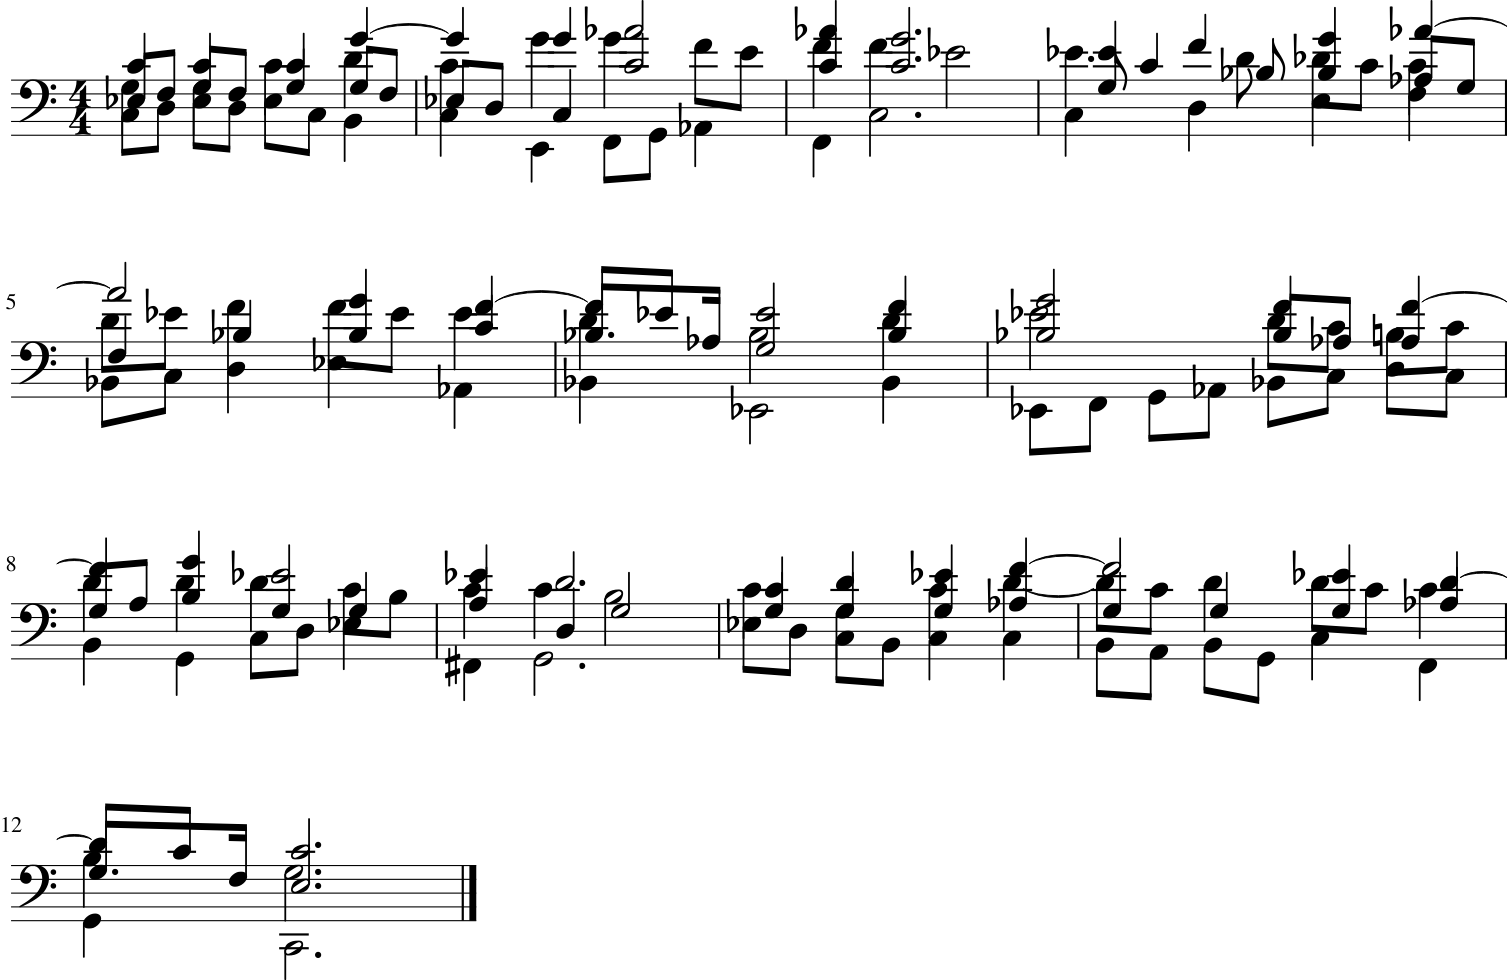

In [63]:
s1.show()

In [33]:
s1.show("midi")

In [24]:
paths = m21.corpus.getComposer('bach','xml')
for path in paths:
    fname = os.path.basename(path)
    re, ext = os.path.splitext(fname)
    fname = PATH+re+"_flat_trans.txt"
    s1 = m21.corpus.parse(path)
    l, ss = convert_to_mldata_3(s1)
    with open(fname, 'w') as file:
        file.write(ss)
    print(re, l)

bwv1.6 2312
bwv10.7 1200
bwv101.7 1024
bwv102.7 1104
bwv103.6 1180
bwv104.6 956
bwv108.6 1372
bwv11.6 1328
bwv110.7 1000
bwv111.6 1720
bwv112.5-sc 1592
bwv112.5 1412
bwv113.8 1012
bwv114.7 996
bwv115.6 848
bwv116.6 1068
bwv117.4 980
bwv119.9 1072
bwv12.7 1464
bwv120.6 1428
bwv120.8-a 2412
bwv121.6 1364
bwv122.6 816
bwv123.6 1100
bwv124.6 1528
bwv125.6 1052
bwv126.6 2348
bwv127.5 1160
bwv128.5 1788
bwv13.6 1016
bwv130.6 1332
bwv133.6 892
bwv135.6 1368
bwv136.6 1296
bwv137.5 1816
bwv139.6 1096
bwv14.5 1044
bwv140.7 1384
bwv144.3 932
bwv144.6 1268
bwv145-a 1056
bwv145.5 920
bwv146.8 1388
bwv148.6 1008
bwv149.7 2560
bwv151.5 832
bwv153.1 944
bwv153.5 924
bwv153.9 764
bwv154.3 1020
bwv154.8 1168
bwv155.5 1016
bwv156.6 996
bwv157.5 1192
bwv158.4 1352
bwv159.5 1364
bwv16.6 972
bwv161.6 1660
bwv162.6-lpz 1420
bwv164.6 856
bwv165.6 748
bwv166.6 712
bwv168.6 1004
bwv169.7 1244
bwv17.7 1828
bwv171.6 4084
bwv172.6 1616
bwv174.5 1780
bwv175.7 3444
bwv176.6 1732
bwv177.4 976
bwv177.5 1268
bwv178.7 1

In [317]:
fname = PATH+"train/bwv1.6_flatten_transposed.txt"
with open(fname, 'r') as file:
    ss = file.read()

In [347]:
ss

'<score> <notes><p>C4 <t>4, <p>G3 <t>4, <p>E-3 <t>2, <p>C3 <t>2. Empty. <notes><p>F3 <t>2, <p>D3 <t>2. Empty. <notes><p>C4 <t>4, <p>G3 <t>4, <p>G3 <t>2, <p>E-3 <t>2. Empty. <notes><p>F3 <t>2, <p>D3 <t>2. Empty. <notes><p>C4 <t>4, <p>C4 <t>4, <p>G3 <t>4, <p>E-3 <t>2. Empty. <notes><p>C3 <t>2. Empty. <notes><p>G4 <t>8, <p>D4 <t>4, <p>G3 <t>2, <p>B2 <t>4. Empty. <notes><p>F3 <t>2. Empty. <notes><p>C4 <t>4, <p>E-3 <t>2, <p>C3 <t>4. Empty. <notes><p>D3 <t>2. Empty. <notes><p>G4 <t>4, <p>G4 <t>4, <p>C3 <t>4, <p>E2 <t>4. Empty. Empty. Empty. <notes><p>A-4 <t>8, <p>G4 <t>4, <p>C4 <t>8, <p>F2 <t>2. Empty. <notes><p>G2 <t>2. Empty. <notes><p>F4 <t>2, <p>A-2 <t>4. Empty. <notes><p>E4 <t>2. Empty. <notes><p>A-4 <t>4, <p>F4 <t>4, <p>C4 <t>4, <p>F2 <t>4. Empty. Empty. Empty. <notes><p>G4 <t>12, <p>F4 <t>4, <p>C4 <t>12, <p>C3 <t>12. Empty. Empty. Empty. <notes><p>E-4 <t>8. Empty. Empty. Empty. Empty. Empty. Empty. Empty. <notes><p>E-4 <t>4, <p>E-4 <t>6, <p>G3 <t>2, <p>C3 <t>4. Empty. <notes><p>C4 <t>

In [36]:
paths = m21.corpus.getComposer('handel','xml')

In [37]:
paths

[PosixPath('/home/krzysztof/fastai/lib/python3.6/site-packages/music21/corpus/handel/rinaldo/Lascia_chio_pianga.mxl')]

In [25]:
paths = m21.corpus.getComposer('handel','xml')
for path in paths:
    fname = os.path.basename(path)
    re, ext = os.path.splitext(fname)
    fname = PATH+re+"_test.txt"
    s1 = m21.corpus.parse(path)
    l, ss = convert_to_mldata_3(s1)
    with open(fname, 'w') as file:
        file.write(ss)

In [73]:
beginning="[ B-2@16 , D3@16 , B-1@16 , F2@16 ] [ ] [ ] [ ] [ ] [ ] [ F3@2 ] [ ] [ G3@2 ] [ ] [ F3@2 ] [ ] [ ] [ ] [ F3@1 ] [ F3@0 ] [ C4@2 , B-2@16 , D3@16 , B-1@16 , F2@16 ] [ ] [ B-3@2 ] [ ] [ ] [ ] [ B-3@1 ] [ B-3@1 ] [ G3@4 ] [ ] [ ] [ ] [ C4@2 ] [ ] [ D4@2 ] [ ] [ D4@2 , C3@16 , D3@16 , A1@16 , F#2@16 ] [ ] [ F#3@2 ] [ ] [ ] [ ] [ F#3@2 ] [ ] [ G3@2 ] [ ] [ F#3@2 ] [ ] [ F#3@2 ] [ ] [ G3@2 ] [ ] [ A3@2 , C3@4 , D3@4 , F#1@4 , F#2@4 ] [ ] [ ] [ A3@1 ] [ B-3@2 ] [ ] [ C4@2 ] [ ] [ C4@2 ] [ ] [ B-3@2 ] [ ] [ B-2@4 , D3@4 , G1@4 , G2@4 ] [ ] [ G3@2 ] [ ] [ B3@2 , G2@8 , B2@8 , D3@8 , F1@8 , F2@8 ] [ ] [ ] [ B3@1 ] [ C4@2 ] [ ] [ D4@2 ] [ ] [ D4@2 ] [ ] [ F3@2 ] [ ] [ ] [ ] [ ] [ ] [ A-3@4 , G2@8 , D3@8 , F3@8 , B0@8 , B1@8 ] "
prediction="[ ] [ G3@4 , C3@4 , G2@4 ] [ ] [ ] [ ] [ G4@4 , C4@4 , C3@4 , C3@4 ] [ ] [ ] [ ] [ G4@4 , C4@4 , G3@4 , C3@4 ] [ ] [ ] [ ] [ G4@4 , C4@4 , G3@4 , C3@4 ] [ ] [ ] [ ] [ G4@4 , C4@4 , G3@4 , C3@4 ] [ ] [ ] [ ] [ G4@4 , C4@4 , G3@4 , C3@4 ] [ ] [ ] [ ] [ G4@4 , C4@4 , G3@4 , C3@4 ] [ ] [ ] [ ] [ G4@4 , C4@4 , G3@4 , C3@4 ] [ ] [ ] [ ] [ G4@4 , C4@4 , G3@4 , C3@4 ] [ ] [ ] [ ] [ G4@4 , C4@4 , G3@4 , C3@4 ] [ ] [ ] [ ] [ G4@4 , C4@4 , G3@4 , C3@4 ] [ ] [ ] [ ] [ G4@4 , C4@4 , G3@4 , C3@4 ] [ ] [ ] [ ] [ G4@4 , C4@4 , G3@4 , C3@4 ] [ ] [ ] [ ] [ G4@4 , C4@4 , G3@4 , C3@4 ] [ ] [ ] [ ] [ G4@4 , C4@4 , G3@4 , C3@4 ] [ ] [ ] [ ] [ G4@4 , C4@4 , G3@4 , C3@4 ] [ ] [ ] [ ] [ G4@4 , C4@4 , G3@4 , C3@4 ]"
ss = beginning+prediction

In [74]:
ss

'[ B-2@16 , D3@16 , B-1@16 , F2@16 ] [ ] [ ] [ ] [ ] [ ] [ F3@2 ] [ ] [ G3@2 ] [ ] [ F3@2 ] [ ] [ ] [ ] [ F3@1 ] [ F3@0 ] [ C4@2 , B-2@16 , D3@16 , B-1@16 , F2@16 ] [ ] [ B-3@2 ] [ ] [ ] [ ] [ B-3@1 ] [ B-3@1 ] [ G3@4 ] [ ] [ ] [ ] [ C4@2 ] [ ] [ D4@2 ] [ ] [ D4@2 , C3@16 , D3@16 , A1@16 , F#2@16 ] [ ] [ F#3@2 ] [ ] [ ] [ ] [ F#3@2 ] [ ] [ G3@2 ] [ ] [ F#3@2 ] [ ] [ F#3@2 ] [ ] [ G3@2 ] [ ] [ A3@2 , C3@4 , D3@4 , F#1@4 , F#2@4 ] [ ] [ ] [ A3@1 ] [ B-3@2 ] [ ] [ C4@2 ] [ ] [ C4@2 ] [ ] [ B-3@2 ] [ ] [ B-2@4 , D3@4 , G1@4 , G2@4 ] [ ] [ G3@2 ] [ ] [ B3@2 , G2@8 , B2@8 , D3@8 , F1@8 , F2@8 ] [ ] [ ] [ B3@1 ] [ C4@2 ] [ ] [ D4@2 ] [ ] [ D4@2 ] [ ] [ F3@2 ] [ ] [ ] [ ] [ ] [ ] [ A-3@4 , G2@8 , D3@8 , F3@8 , B0@8 , B1@8 ] [ ] [ G3@4 , C3@4 , G2@4 ] [ ] [ ] [ ] [ G4@4 , C4@4 , C3@4 , C3@4 ] [ ] [ ] [ ] [ G4@4 , C4@4 , G3@4 , C3@4 ] [ ] [ ] [ ] [ G4@4 , C4@4 , G3@4 , C3@4 ] [ ] [ ] [ ] [ G4@4 , C4@4 , G3@4 , C3@4 ] [ ] [ ] [ ] [ G4@4 , C4@4 , G3@4 , C3@4 ] [ ] [ ] [ ] [ G4@4 , C4@4 , G3@4 , C3

In [75]:
s1=convert_from_mldata_3(ss)

SyntaxError: invalid syntax (<unknown>, line 1)

In [68]:
s1.show('midi')

In [64]:
lst = [[['B-2', '16 '], ['D3', '16 '], ['B-1', '16 '], ['F2', '16']], [], [], [], [], [], [['F3', '2']], [], [['G3', '2']], [], [['F3', '2']], [], [], [], [['F3', '1']], [['F3', '0']], [['C4', '2 '], ['B-2', '16 '], ['D3', '16 '], ['B-1', '16 '], ['F2', '16']], [], G3', '2']], [], [['C4', '2']], [], [['G3', '2']], [], [['C4', '2 '], ['G3', '4 '], ['D3', '4 '], ['G2', '4']], [], [['C4', '2']], [], [['C4', '4 '], ['G3', '4 '], ['D3', '4 '], ['G2', '4']], [], [], [], [['C4', '4 '], ['G3', '4 '], ['D3', '4 '], ['G2', '4']], [], [], []]

SyntaxError: invalid syntax (<ipython-input-64-be919dcd4834>, line 1)